# Techno Genre: Dowloading Tracks and Audio Features from Spotify

Following the outline provided in the previous notebook but in much less detail and for a different playlist, this notebook will access two Spotify API endpoints (Get a Playlist's Tracks and Get Audio Features), perform EDA on audio features, and download the 30 second mp3 files directly to a local drive.

- Step 1 = [Spotify Client Credentials](#section1)
- Step 2 = [Spotify API Request: Get a Playlist's Tracks](#section2)
- Step 3 = [Spotify API Request: Get Audio Features](#section3)
- Step 4 = [EDA of Audio Features](#section4)
- Step 5 = [Merge Dataframes](#section5)
- Step 6 = [Download Techno files to Local Drive](#section6)


**Helpful resources I used include:**
<br>Shout-out to this blogpost and github link from Tomi Gelo which helped me bypass the track request limits and use the list of track_ids to download audio features!
 - https://github.com/tgel0/spotify-data/blob/master/notebooks/SpotifyDataRetrieval.ipynb
 - https://tgel0.github.io/blog/spotify-data-project-part-1-from-data-retrieval-to-first-insights/

In [1]:
#load imports
import config
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

 <a id='section1'></a>
## Step 1. Obtaining Authorization: Spotify Client Credentials

In [2]:
# use Spotipy library to authorize my credentials, using the Client Credentials Flow 
client_credentials_manager = SpotifyClientCredentials(client_id=config.CLIENT_ID, client_secret=config.CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


<a id='section2'></a>
## Step 2: Spotify API Request: Get a Playlist's Tracks

In [5]:
# empty lists for each column
track_id = []
track_name = []
mp3 = []
track_length = []
track_pop = []
album_date = []
artist_id = []
artist_name = []
None_counter = 0   #track the number of songs without a mp3 link


for j in range(0, 3000, 100):
    #Start track download. Params = user id, playlist id;  offset to get more than 100 tracks
    results = sp.user_playlist_tracks(config.USER_ID, '6URIU40oNXbfd5z0Ieh9GJ', offset=j)
    for i, t in enumerate(results['items']): 
        track_id.append(t['track']['id'])
        track_name.append(t['track']['name'])
        mp3.append(t['track']['preview_url'])
        if t['track']['preview_url'] == None:
            None_counter += 1       #we won't want to keep these tracks without an mp3 link   
        track_length.append(t['track']['duration_ms'])
        track_pop.append(t['track']['popularity'])
        album_date.append(t['track']['album']['release_date'])
      
        for a, b in enumerate(t['track']['artists']):
            if a == 0:          #only prints the FIRST artist  (a=0(1 artist);  a=1(2 artists), etc)
                                #we only want 1 artist per track so everything will fit nicely into a dataframe
                artist_id.append(b['id'])
                artist_name.append(b['name'])


#put all the new lists into a dataframe
df_tracks = pd.DataFrame({'track_id':track_id,"track_name": track_name, "mp3": mp3, "track_length": track_length, 
                         "track_pop": track_pop, "album_date": album_date, "artist_id": artist_id, 
                          "artist_name": artist_name})

print('Total number of tracks in playlist:', len(df_tracks))
print('Number of tracks without mp3 link:',None_counter)
print('Number of usable tracks:', int(len(df_tracks))-None_counter)


df_tracks.head()

Total number of tracks in playlist: 1486
Number of tracks without mp3 link: 608
Number of usable tracks: 878


,album_date,artist_id,artist_name,mp3,track_id,track_length,track_name,track_pop
0,2015-04-03,5nPOO9iTcrs9k6yFffPxjH,Röyksopp,https://p.scdn.co/mp3-preview/61ecda549bdc2787...,6j3HojCSc3I4gK8vb0sN7S,396774,I Had This Thing - Joris Voorn Remix,10
1,2011-07-29,7JfTEfBRAB8ccDajaHdMlT,Audiofly,None,3duAPdNltWzrnea3sZmdaE,473550,6 Degrees (feat. Fiora) - Tale Of Us Remix,18
2,2010-06-21,2zgFYHwSEYOc1KnldGsBXK,Oxia,None,7bEPjQ1OKFUmg1m4oukyZG,433306,Domino,1
3,2008-10-30,5kLzaeSHrmS7okc5XNE6lv,Butch,None,441Bpzf1HXbUDBOVMH2Yjr,367619,Amelie (Original Mix) - Original Mix,0
4,2009-11-02,6Th7POyVfZgiHJQ64ddV5Y,Rodriguez Jr.,https://p.scdn.co/mp3-preview/c56c274b201a238d...,3Pl9W7zSfrcoNXjTBFG5cv,428394,Lila,11


#### Step 2.2: Drop songs without a mp3 link from our dataframe

In [6]:
# drop any columns that have mp3 = None, and reset index
df_tracks = df_tracks.dropna(subset = ["mp3"])
df_tracks.reset_index(drop=True, inplace=True)

print(df_tracks.shape)
df_tracks.tail()

(878, 8)


,album_date,artist_id,artist_name,mp3,track_id,track_length,track_name,track_pop
873,2018-10-26,4uSLuEAH4lVnjAZwrlixk1,Lehar,https://p.scdn.co/mp3-preview/53ae5ee16c4c1aca...,4VBoJXPyNDLR2D3zdrpI8q,366173,Blue Wolf - mixed,20
874,2019-02-15,5HfazbsZC06O4dycKstvWh,Rolbac,https://p.scdn.co/mp3-preview/8b9591921b3b3d77...,2yBe0KKH7QxHJVWxnaDhUB,420240,Lost - Collé Remix,11
875,2018-02-19,0GH3NHvWddE49Egn2D5aRg,Brame & Hamo,https://p.scdn.co/mp3-preview/36a487c30d05231b...,4YU7kjwU5ebyKS9QzkcAFK,403480,Roy Keane,47
876,2008-05-03,5XFQLyJekhzCO7PiTqboOB,Robert Babicz,https://p.scdn.co/mp3-preview/4a8a14db6e3c60ec...,7mrDkArgIuFoNtgtsmbe2N,521427,Dark Flower - Joris Voorn Magnolia Mix,26
877,2018-07-06,1vpJBCwcAMbetCwtn2KPEG,Supernova,https://p.scdn.co/mp3-preview/1849825573e0d8e1...,3ZcjaZ8kqimC1lgQ3662U0,394669,Tuyo - Original Mix,38


In [7]:
df_tracks.describe()

,track_length,track_pop
count,8.780000e+02,878.000000
mean,4.133037e+05,27.833713
std,9.281613e+04,15.286684
min,1.490800e+05,0.000000
25%,3.658900e+05,15.000000
50%,4.178090e+05,29.000000
75%,4.692448e+05,39.000000
max,1.057186e+06,72.000000


<a id='section3'></a>
## Step 3: Spotify API Request: Get Audio Features for Several Tracks

This is a new request for a different Spotify endpoint, using the list of `track_id`s acquired from the first request. For the API documentation, see: https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

In [8]:
rows = []          #list to append each track features to
batchsize = 100    #max number of track ids we're allowed to submit per query
None_counter = 0   #count if there are any songs without any audio features

for i in range(0,len(df_tracks['track_id']), batchsize):    #step = batchsize
    batch = df_tracks['track_id'][i:i+batchsize]            #batch is now a list of all 878 track_ids

    feature_results = sp.audio_features(batch)             #begins querying the audio features endpoint

    for i, t in enumerate(feature_results):       
        if t == None:                                      #if the audio features for a song are missing, count 1 
            None_counter += 1          
        else:
            rows.append(t)
    
print('Number of tracks where no audio features were available:',None_counter)
print('Number of usable tracks:', len(rows))

Number of tracks where no audio features were available: 0
Number of usable tracks: 878


#### Step 3.2: Create a dataframe

In [9]:
df_audio_features = pd.DataFrame.from_dict(rows, orient='columns')
print(df_audio_features.shape)
df_audio_features.head()

(878, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.001230,https://api.spotify.com/v1/audio-analysis/6j3H...,0.815,396774,0.368,6j3HojCSc3I4gK8vb0sN7S,0.432,7,0.0868,-10.659,0,0.0499,124.000,4,https://api.spotify.com/v1/tracks/6j3HojCSc3I4...,audio_features,spotify:track:6j3HojCSc3I4gK8vb0sN7S,0.442
1,0.000817,https://api.spotify.com/v1/audio-analysis/3Pl9...,0.806,428395,0.766,3Pl9W7zSfrcoNXjTBFG5cv,0.910,5,0.0839,-8.317,0,0.0399,127.012,4,https://api.spotify.com/v1/tracks/3Pl9W7zSfrco...,audio_features,spotify:track:3Pl9W7zSfrcoNXjTBFG5cv,0.405
2,0.127000,https://api.spotify.com/v1/audio-analysis/01gq...,0.950,434749,0.375,01gqP6pHjuegINMFW0NzOM,0.877,8,0.0838,-11.221,1,0.2440,124.010,4,https://api.spotify.com/v1/tracks/01gqP6pHjueg...,audio_features,spotify:track:01gqP6pHjuegINMFW0NzOM,0.635
3,0.021400,https://api.spotify.com/v1/audio-analysis/5sXP...,0.788,371613,0.761,5sXPMrhz0tgJUgymCXwAvz,0.877,7,0.1090,-8.454,1,0.0792,123.977,4,https://api.spotify.com/v1/tracks/5sXPMrhz0tgJ...,audio_features,spotify:track:5sXPMrhz0tgJUgymCXwAvz,0.219
4,0.000488,https://api.spotify.com/v1/audio-analysis/5ROU...,0.806,347000,0.729,5ROUZM9gxbj9RBqBqc9GJh,0.880,1,0.0896,-7.962,1,0.0631,128.023,4,https://api.spotify.com/v1/tracks/5ROUZM9gxbj9...,audio_features,spotify:track:5ROUZM9gxbj9RBqBqc9GJh,0.397


#### Step 3.3 Drop unnecessary columns

In [10]:
# analysis_url and track_href are empty links, type says "audio_features" in all, and uri is repetitive of track_id
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

# rename the "id" column so it matches the other dataframe
df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(878, 14)

<a id='section4'></a>
## Step 4: EDA of Audio Features

In [11]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 14 columns):
acousticness        878 non-null float64
danceability        878 non-null float64
duration_ms         878 non-null int64
energy              878 non-null float64
track_id            878 non-null object
instrumentalness    878 non-null float64
key                 878 non-null int64
liveness            878 non-null float64
loudness            878 non-null float64
mode                878 non-null int64
speechiness         878 non-null float64
tempo               878 non-null float64
time_signature      878 non-null int64
valence             878 non-null float64
dtypes: float64(9), int64(4), object(1)
memory usage: 96.1+ KB


In [12]:
df_audio_features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,878.000000,878.000000,8.780000e+02,878.000000,878.00000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,0.061042,0.747707,4.133037e+05,0.665870,0.76743,5.679954,0.134614,-9.747481,0.513667,0.062254,124.015841,3.937358,0.325036
std,0.133080,0.098671,9.281582e+04,0.164829,0.22391,3.580491,0.117630,2.559537,0.500098,0.042517,9.422566,0.293515,0.227581
min,0.000007,0.203000,1.490800e+05,0.174000,0.00001,0.000000,0.026500,-20.254000,0.000000,0.026300,60.125000,1.000000,0.024200
25%,0.001263,0.705000,3.658908e+05,0.543000,0.74125,2.000000,0.082225,-11.268500,0.000000,0.041425,121.989000,4.000000,0.134250
50%,0.007925,0.771000,4.178095e+05,0.680000,0.86100,6.000000,0.102000,-9.539000,1.000000,0.051150,123.994000,4.000000,0.282500
75%,0.051325,0.805000,4.692448e+05,0.795750,0.90200,9.000000,0.119750,-8.044750,1.000000,0.065250,125.994000,4.000000,0.484750
max,0.987000,0.984000,1.057187e+06,0.983000,0.96900,11.000000,0.923000,-2.352000,1.000000,0.487000,247.955000,5.000000,0.976000


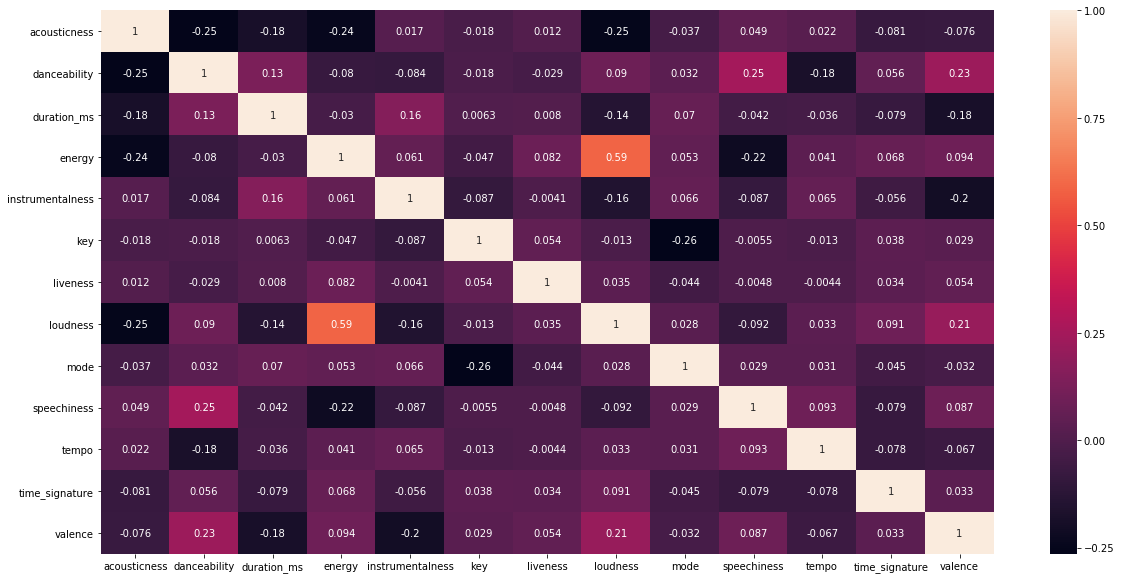

In [13]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_audio_features.corr(), annot =True);

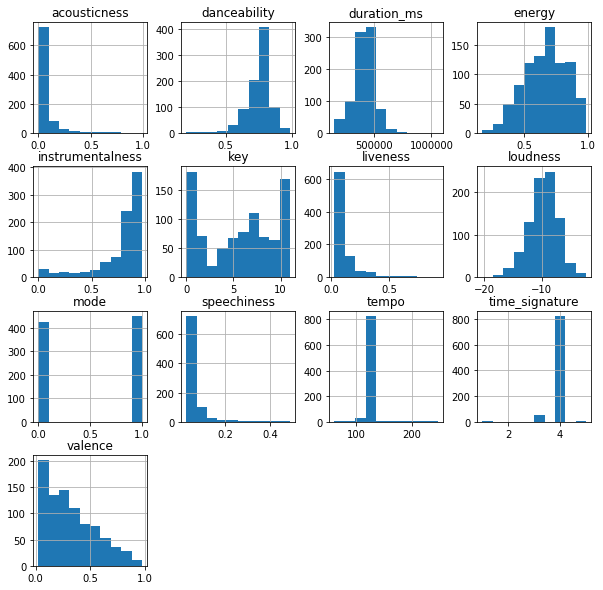

In [14]:
df_audio_features.hist(figsize = (10, 10));

In [15]:
# sns.pairplot(df_audio_features)

- From EDA we find that the average tempo is expected at around 124 bpm, which is slower and less energetic than the EDM playlist.
- The "instrumentalness" histogram tells us the Spotify algorithm predicts there are almost no vocals present in this techno playlist, while the corresponding EDM playlist had an inverse distribution with Spotify predicting vocals in the majority of songs. 
- Another difference in each playlist is the "danceability" rating, with the techno playlist having an overall higher average and larger right-skew distribution than the EDM playlist, which is to be expected!

<a id='section5'></a>
## Step 5: Merge both dataframes and save

In [16]:
print(df_tracks.shape)
print(df_audio_features.shape)

(878, 8)
(878, 14)


In [17]:
# merge both dataframes
frames = [df_tracks, df_audio_features]
df = pd.concat(frames, axis = 1)

print("Shape of the dataset:", df.shape)
df.tail()

Shape of the dataset: (878, 22)


,album_date,artist_id,artist_name,mp3,track_id,track_length,track_name,track_pop,acousticness,danceability,...,track_id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
873,2018-10-26,4uSLuEAH4lVnjAZwrlixk1,Lehar,https://p.scdn.co/mp3-preview/53ae5ee16c4c1aca...,4VBoJXPyNDLR2D3zdrpI8q,366173,Blue Wolf - mixed,20,0.004150,0.763,...,4VBoJXPyNDLR2D3zdrpI8q,0.881,4,0.1010,-9.446,0,0.0536,120.410,3,0.336
874,2019-02-15,5HfazbsZC06O4dycKstvWh,Rolbac,https://p.scdn.co/mp3-preview/8b9591921b3b3d77...,2yBe0KKH7QxHJVWxnaDhUB,420240,Lost - Collé Remix,11,0.000627,0.785,...,2yBe0KKH7QxHJVWxnaDhUB,0.870,10,0.0514,-11.717,0,0.2660,119.001,4,0.288
875,2018-02-19,0GH3NHvWddE49Egn2D5aRg,Brame & Hamo,https://p.scdn.co/mp3-preview/36a487c30d05231b...,4YU7kjwU5ebyKS9QzkcAFK,403480,Roy Keane,47,0.000559,0.812,...,4YU7kjwU5ebyKS9QzkcAFK,0.937,10,0.0453,-6.470,0,0.0757,124.003,4,0.579
876,2008-05-03,5XFQLyJekhzCO7PiTqboOB,Robert Babicz,https://p.scdn.co/mp3-preview/4a8a14db6e3c60ec...,7mrDkArgIuFoNtgtsmbe2N,521427,Dark Flower - Joris Voorn Magnolia Mix,26,0.000935,0.755,...,7mrDkArgIuFoNtgtsmbe2N,0.799,10,0.1380,-7.732,1,0.0721,126.008,4,0.529
877,2018-07-06,1vpJBCwcAMbetCwtn2KPEG,Supernova,https://p.scdn.co/mp3-preview/1849825573e0d8e1...,3ZcjaZ8kqimC1lgQ3662U0,394669,Tuyo - Original Mix,38,0.006090,0.817,...,3ZcjaZ8kqimC1lgQ3662U0,0.261,1,0.0570,-9.089,1,0.0532,124.001,4,0.542


In [18]:
df.isnull().sum()

album_date          0
artist_id           0
artist_name         0
mp3                 0
track_id            0
track_length        0
track_name          0
track_pop           0
acousticness        0
danceability        0
duration_ms         0
energy              0
track_id            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [19]:
# save this final df and comment out
df.to_csv("./datasets/techno.csv")

In [20]:
# verify the df saved and can be retrieved 
df = pd.read_csv("./datasets/techno.csv", index_col = 'Unnamed: 0')
df.head()

,album_date,artist_id,artist_name,mp3,track_id,track_length,track_name,track_pop,acousticness,danceability,...,track_id.1,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2015-04-03,5nPOO9iTcrs9k6yFffPxjH,Röyksopp,https://p.scdn.co/mp3-preview/61ecda549bdc2787...,6j3HojCSc3I4gK8vb0sN7S,396774,I Had This Thing - Joris Voorn Remix,10,0.001230,0.815,...,6j3HojCSc3I4gK8vb0sN7S,0.432,7,0.0868,-10.659,0,0.0499,124.000,4,0.442
1,2009-11-02,6Th7POyVfZgiHJQ64ddV5Y,Rodriguez Jr.,https://p.scdn.co/mp3-preview/c56c274b201a238d...,3Pl9W7zSfrcoNXjTBFG5cv,428394,Lila,11,0.000817,0.806,...,3Pl9W7zSfrcoNXjTBFG5cv,0.910,5,0.0839,-8.317,0,0.0399,127.012,4,0.405
2,2009-04-06,2yPveJtn9DpeN0CgNJHvAQ,Stimming,https://p.scdn.co/mp3-preview/526a33289741f95b...,01gqP6pHjuegINMFW0NzOM,434749,SONG FOR ISABELLE,29,0.127000,0.950,...,01gqP6pHjuegINMFW0NzOM,0.877,8,0.0838,-11.221,1,0.2440,124.010,4,0.635
3,2011-03-21,3HRRzIZNQFus3xlUx2xKy1,Joris Delacroix,https://p.scdn.co/mp3-preview/2c83f32e50bc23ac...,5sXPMrhz0tgJUgymCXwAvz,371612,Air France,32,0.021400,0.788,...,5sXPMrhz0tgJUgymCXwAvz,0.877,7,0.1090,-8.454,1,0.0792,123.977,4,0.219
4,2009-01-01,11chB4Th19iMA7j65oGMk1,Funkin Matt,https://p.scdn.co/mp3-preview/fd2058e471b3f307...,5ROUZM9gxbj9RBqBqc9GJh,347000,Doubles,8,0.000488,0.806,...,5ROUZM9gxbj9RBqBqc9GJh,0.880,1,0.0896,-7.962,1,0.0631,128.023,4,0.397


<a id='section6'></a>
## Step 6: Download techno song clips to local drive

In [21]:
import urllib.request

In [22]:
# I have prepared an empty folder titled "Techno" where each download will be stored under its track_id identifier.
for index, row in df.iterrows():
    url = row['mp3']
    name = row['track_id']
#     print(url)
#     print(row['track_id'])
    urllib.request.urlretrieve(url, './downloads/techno/' + name + '.mp3') 